In [14]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
df_rate_books = pd.read_csv(r'DB\improved_dataset.csv')


In [16]:
df_rate_books

,title,authors_x,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,authors_y,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,"[{'author_id': '1077326', 'role': ''}]",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9284,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,"[{'author_id': '940746', 'role': ''}, {'author...",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9285,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,"[{'author_id': '940746', 'role': ''}]",0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9286,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,"[{'author_id': '940746', 'role': ''}]",0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9287,Poor People,William T. Vollmann,3.72,eng,434,769,139,2/27/2007,"[{'author_id': '940746', 'role': ''}]",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [17]:
df_rate_books.columns

Index(['title', 'authors_x', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'authors_y',
       'children', 'comics, graphic', 'fantasy, paranormal', 'fiction',
       'history, historical fiction, biography', 'mystery, thriller, crime',
       'non-fiction', 'poetry', 'romance', 'young-adult'],
      dtype='object')

In [18]:
df_rate_books.isnull().sum()

title                                      0
authors_x                                  0
average_rating                             0
language_code                              0
  num_pages                                0
ratings_count                              0
text_reviews_count                         0
publication_date                           0
authors_y                                  0
children                                  39
comics, graphic                           39
fantasy, paranormal                       39
fiction                                   39
history, historical fiction, biography    39
mystery, thriller, crime                  39
non-fiction                               39
poetry                                    39
romance                                   39
young-adult                               39
dtype: int64

In [19]:
#df_rate_books['genre'].nunique()

In [20]:

# Calculate the frequency of each genre
#genre_frequency = df_rate_books['genres'].value_counts(normalize=True)




In [21]:
#genre_frequency

In [22]:
# Map the frequency values to the 'genres' column
#df_rate_books['genres_frequency_encoded'] = df_rate_books['genres'].map(genre_frequency)

In [23]:
df_rate_books.columns

Index(['title', 'authors_x', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'authors_y',
       'children', 'comics, graphic', 'fantasy, paranormal', 'fiction',
       'history, historical fiction, biography', 'mystery, thriller, crime',
       'non-fiction', 'poetry', 'romance', 'young-adult'],
      dtype='object')

<h3> Count words in titles </h3>

In [24]:
df_rate_books['title_word_count'] = df_rate_books['title'].apply(lambda x: len(str(x).split()))


<h3> Count authors </h3>

In [25]:
#df_rate_books['authors_name_count'] = df_rate_books['authors'].apply(lambda x: len(str(x).split('/')))


<h3> Creating interaction features can capture relationships between different columns and potentially improve the predictive power of our model.</h3>
<h4> Interaction Feature: 'author_mean_rates' and 'average_rating'</h4>

<h4> 'num_pages' column will be divided into bins representing different ranges of page counts (0-100, 101-200, etc.). The resulting 'num_pages_bucket' column contains the corresponding bin labels for each book.</h4>

In [26]:
df_rate_books.head()

,title,authors_x,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,authors_y,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult,title_word_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,9
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,11
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,"[{'author_id': '1077326', 'role': ''}]",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,"[{'author_id': '1077326', 'role': ''}, {'autho...",1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9


In [27]:
index = df_rate_books.columns
for each in index:
    df_rate_books = df_rate_books.rename(columns={f"{each}" : f"{each.replace(',', '_').replace(' ','')}"})

In [ ]:
df_rate_books.columns

Index(['title', 'authors_x', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'authors_y',
       'children', 'comics_graphic', 'fantasy_paranormal', 'fiction',
       'history_historicalfiction_biography', 'mystery_thriller_crime',
       'non-fiction', 'poetry', 'romance', 'young-adult', 'title_word_count'],
      dtype='object')

In [28]:
#df_rate_books = df_rate_books.drop(['title', 'authors','publication_date','language_code','country_code'],axis=1)

In [29]:
df_rate_books.isna().sum()

title                                   0
authors_x                               0
average_rating                          0
language_code                           0
num_pages                               0
ratings_count                           0
text_reviews_count                      0
publication_date                        0
authors_y                               0
children                               39
comics_graphic                         39
fantasy_paranormal                     39
fiction                                39
history_historicalfiction_biography    39
mystery_thriller_crime                 39
non-fiction                            39
poetry                                 39
romance                                39
young-adult                            39
title_word_count                        0
dtype: int64

In [30]:
df_rate_books.query('average_rating<2.8')

,title,authors_x,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,authors_y,children,comics_graphic,fantasy_paranormal,fiction,history_historicalfiction_biography,mystery_thriller_crime,non-fiction,poetry,romance,young-adult,title_word_count
473,In Web Design for Libraries,Charles P. Rubenstein,2.67,eng,196,9,2,12/1/2006,"[{'author_id': '1839692', 'role': ''}]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5
3823,The Trouble with the Pears: An Intimate Portra...,Gia Bathory Al Babel,2.55,eng,272,33,7,2/14/2006,"[{'author_id': '3856793', 'role': ''}]",0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,11
4413,Alentejo Blue,Monica Ali,2.72,eng,304,788,104,6/20/2006,"[{'author_id': '11271', 'role': ''}]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4450,Yellow Dog,Martin Amis,2.79,eng,352,1449,94,1/4/2005,"[{'author_id': '11337', 'role': ''}]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5515,Field Guide to Home Buying in America,Mark LeVine/Michael Pollan/Stephen M. Pollan,2.50,eng,256,4,1,5/15/1988,"[{'author_id': '13806', 'role': ''}, {'author_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7001,Introduction to the Philosophies of Research a...,James Paul,2.75,eng,360,4,1,10/18/2004,"[{'author_id': '8154204', 'role': ''}]",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14
7446,Citizen Girl,Emma McLaughlin/Nicola Kraus,2.40,en-US,305,5415,577,10/4/2005,"[{'author_id': '9222', 'role': ''}, {'author_i...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2
7565,A Matter of Trust,Penny Jordan,2.61,eng,224,36,5,12/23/1994,"[{'author_id': '19687', 'role': ''}]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4
7574,Bright Star's Promise,Karen A. Bale,2.77,eng,444,13,3,7/1/1994,"[{'author_id': '19724', 'role': ''}]",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3
7810,The Governess; or The Little Female Academy,Sarah Fielding/Candace Ward,2.63,eng,242,132,18,9/26/2005,"[{'author_id': '20540', 'role': ''}, {'author_...",1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7


In [32]:
# corr = df_rate_books.corr()
# corr['average_rating']

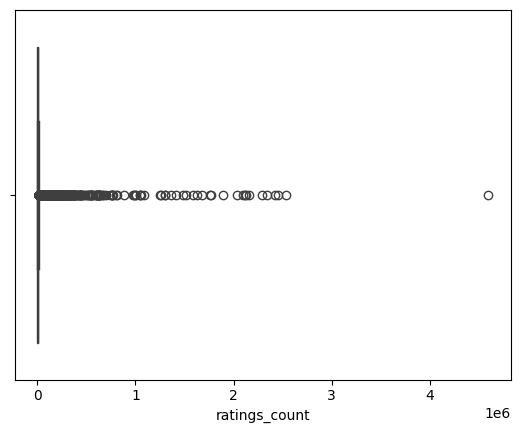

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for 'ratings_count'
sns.boxplot(x=df_rate_books['ratings_count'])
plt.show()


In [37]:
X = df_rate_books.drop(columns=['author_mean_rates_rating','num_pages_bucket','author_mean_rates_rating'], axis=1)
#X = X.drop(X.)
y = df_rate_books['average_rating']

KeyError: "['author_mean_rates_rating', 'num_pages_bucket', 'author_mean_rates_rating'] not found in axis"

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [74]:
# Set parameters for the LightGBM model
params = {
    'objective': 'regression', 
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'iteration':1000,
    'early_stopping_rounds': 10  # Set early stopping rounds here
}


In [75]:
# Train the model
num_boost_round = 1000  # we can set this to a large number
lgb_model = lgb.train(params, train_data, num_boost_round=num_boost_round,valid_sets=[test_data])

[LightGBM] [Warning] Unknown parameter: iteration
[LightGBM] [Warning] Unknown parameter: iteration
[LightGBM] [Warning] Unknown parameter: iteration


In [76]:
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)


In [77]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.00011897191235212878
Root Mean Squared Error: 0.010907424643431134
R-squared (R2) Score: 0.9983963594014623


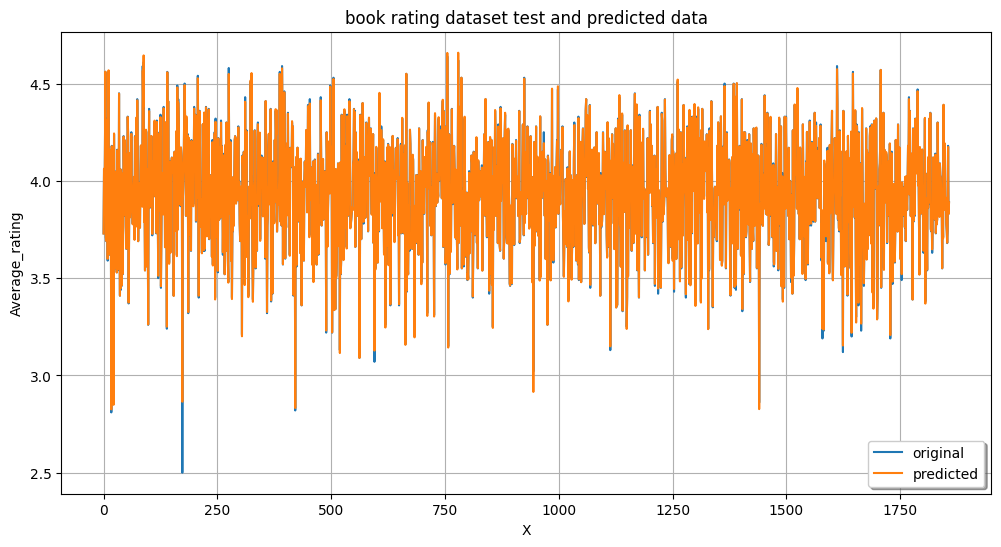

In [78]:
import matplotlib.pyplot as plt
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("book rating dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Average_rating')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

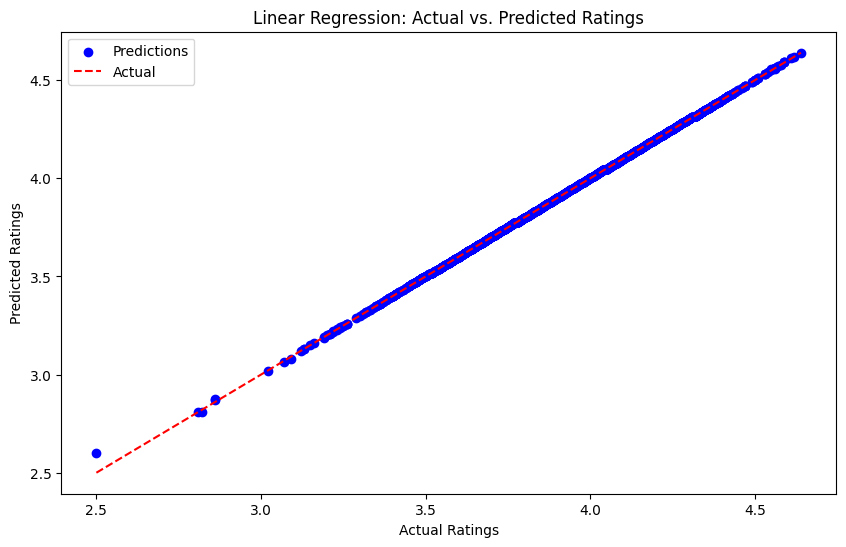

In [79]:
# Plotting the results for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Linear Regression: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

 The decrease in RMSE from 0.19 to 0.017 is a positive outcome, indicating that our regression model is performing better in terms of predicting book ratings. It suggests increased accuracy and reduced prediction errors, leading to a more reliable model that's what we can see in the plot.

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have a DataFrame named 'books_data' containing features and ratings
# X contains the features and y contains the ratings

# Splitting the data into training and testing sets

# Creating a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
predictions = rf_model.predict(X_test)

# Evaluating the model
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2 score)
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 5.96759956942951e-06
Root Mean Squared Error: 0.0024428670797711264
R-squared (R2) Score: 0.9999195618129006


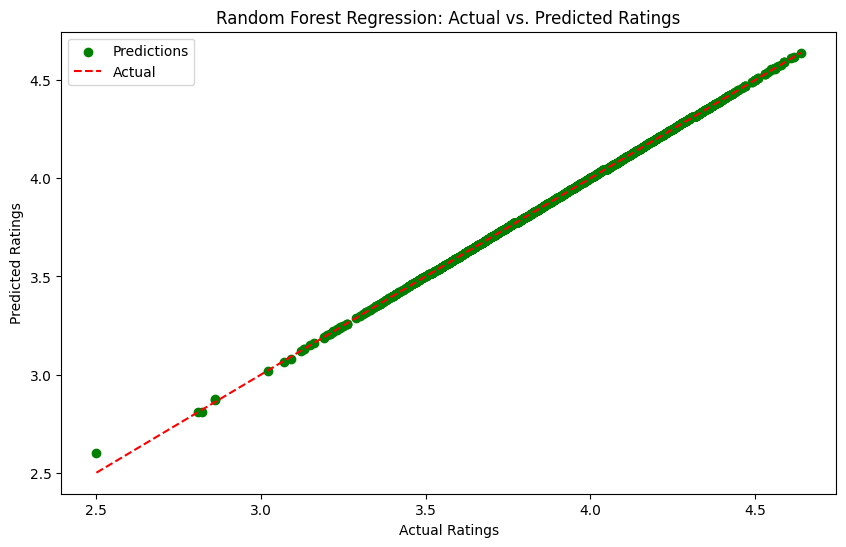

In [81]:
# Plotting the results for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='green', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.title('Random Forest Regression: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()
